In [ ]:
import pandas as pd
import numpy as np 
#for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#for evaluation
from sklearn.metrics import mean_absolute_error, r2_score, classification_report,confusion_matrix , accuracy_score, f1_score
import sys
import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('/content/gamma_stft.xlsx',sheet_name='S-ZO')
df.head()

,mean,variance,skewness,kurtosis
0,12.466769,351.389569,1.355803,4.392854
1,20.642700,1068.050678,1.362178,4.245450
2,16.890266,689.796409,1.694983,6.497073
3,4.183841,36.506889,1.246755,4.294954
4,12.672505,396.686673,1.346155,4.098919


In [ ]:
target = pd.read_excel('/content/gamma_stft.xlsx',sheet_name='targetS-ZO')

In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df, target, test_size = 0.3, random_state = 1)

#PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_data = scaler.transform(df)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x_pca = pca.transform(scaled_data)

In [ ]:
scaled_data.shape

(300, 4)

In [ ]:
x_pca.shape

(300, 2)

Text(0, 0.5, 'Second principal component')

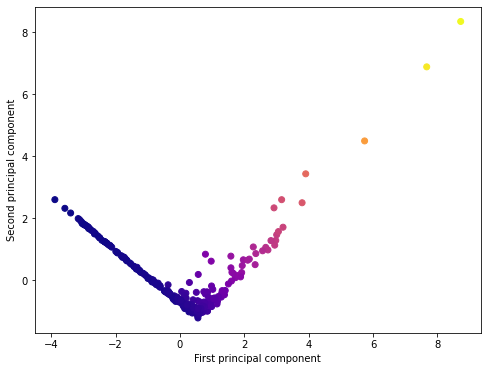

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['mean'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [ ]:
x=df.iloc[:,0:]
y=target

In [ ]:
x

,mean,variance,skewness,kurtosis
0,12.466769,351.389569,1.355803,4.392854
1,20.642700,1068.050678,1.362178,4.245450
2,16.890266,689.796409,1.694983,6.497073
3,4.183841,36.506889,1.246755,4.294954
4,12.672505,396.686673,1.346155,4.098919
...,...,...,...,...
295,1.502283,7.036588,5.686638,56.594598
296,1.647582,8.300477,5.404621,53.044099
297,2.780982,22.134123,2.290913,10.598286
298,2.564235,18.531350,2.175717,10.555823


In [ ]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
295,0
296,0
297,0
298,0


In [ ]:
from sklearn.model_selection import train_test_split
x_Train,x_Test,y_Train,y_Test =train_test_split(x,y,train_size =.8)

#DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [ ]:
import numpy as np
from sklearn.utils.multiclass import is_multilabel

In [ ]:
model.fit(x_Train,y_Train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
?# Necessary imports
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()


# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 6)

tree_cv.fit(xTrain, yTrain)
  
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Object `` not found.
Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 1}
Best score is 0.8619047619047618


In [ ]:
y_pred = tree_cv.predict(x_Test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_Test,y_pred))

0.9166666666666666


In [ ]:
dtc_acc = accuracy_score(y_Test,y_pred)
print(dtc_acc)

0.9166666666666666


In [ ]:
results = pd.DataFrame()
results

""


In [ ]:
tempResults = pd.DataFrame({'Algorithm':['Decision tree Classifier Method'], 'Accuracy':[dtc_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision tree Classifier Method,0.916667


##Logistic Regression

In [ ]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Creating the hyperparameter grid
c_space = np.logspace(-5, 9, 13)
param_grid = {'C': c_space}

# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 6)
  
logreg_cv.fit(x_Train, y_Train)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 0.4641588833612782}
Best score is 0.8458333333333333


In [ ]:
y_pred = logreg_cv.predict(x_Test)

In [ ]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [ ]:
y_Test

,target
104,0
223,0
19,1
59,1
164,0
115,0
188,0
56,1
178,0
92,1


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_Test, y_pred))

0.9


In [ ]:
lr_acc = accuracy_score(y_Test, y_pred)
print(lr_acc)

0.9


In [ ]:
tempResults = pd.DataFrame({'Algorithm':['Logistic Regression Method'], 'Accuracy':[lr_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision tree Classifier Method,0.916667
0,Logistic Regression Method,0.900000


In [ ]:
##SVM-Linear

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_Train, y_Train)

#Predict the response for test dataset
y_pred = clf.predict(x_Test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_Test, y_pred)
cm

array([[37,  1],
       [ 5, 17]])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_Test,y_pred))

0.9


In [ ]:
svm_lin_acc = accuracy_score(y_Test,y_pred)
print(svm_lin_acc)

0.9


In [ ]:
tempResults = pd.DataFrame({'Algorithm':['SVM-Linear Karnel Classifier Method'], 'Accuracy':[svm_lin_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision tree Classifier Method,0.916667
0,Logistic Regression Method,0.900000
0,SVM-Linear Karnel Classifier Method,0.900000


#KNN

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(x_Train, y_Train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 7, 'weights': 'uniform'}


In [ ]:
# Predicting the Test set results
y_pred = model1.predict(x_Test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_Test, y_pred)
cm

array([[32,  6],
       [ 6, 16]])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_Test, y_pred))

0.8


In [ ]:
knn_acc = accuracy_score(y_Test, y_pred)
print(knn_acc)

0.8


In [ ]:
tempResults = pd.DataFrame({'Algorithm':['KNN Classifier Method'], 'Accuracy':[knn_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision tree Classifier Method,0.916667
0,Logistic Regression Method,0.900000
0,SVM-Linear Karnel Classifier Method,0.900000
0,KNN Classifier Method,0.800000


##RandomForest

In [ ]:
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.datasets import make_classification
xTrain, yTrain = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(xTrain, yTrain)
RandomForestClassifier(...)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=Ellipsis,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
RandomForestClassifier(max_depth=2, random_state=0)
print(clf.feature_importances_)

[0.14205973 0.76664038 0.0282433  0.06305659]


In [ ]:
y_pred = clf.predict(x_Test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
accuracy_score(y_Test, y_pred)

0.36666666666666664

In [ ]:
rfc_acc = accuracy_score(y_Test,y_pred)
print(rfc_acc)

0.36666666666666664


In [ ]:
tempResults = pd.DataFrame({'Algorithm':['Random Forest Classifier Method'], 'Accuracy':[rfc_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision tree Classifier Method,0.916667
0,Logistic Regression Method,0.900000
0,SVM-Linear Karnel Classifier Method,0.900000
0,KNN Classifier Method,0.800000
0,Random Forest Classifier Method,0.366667


## EDA

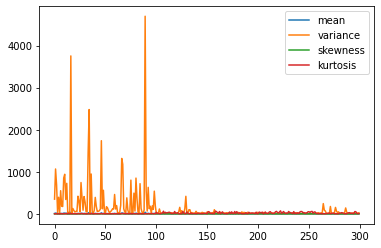

In [ ]:
df.plot()

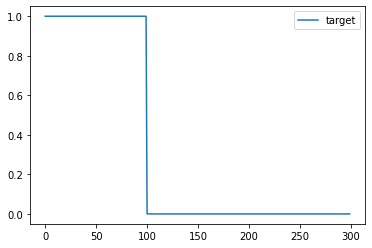

In [ ]:
target.plot()

In [ ]:
corr = df.corr()
df.corr()

,mean,variance,skewness,kurtosis
mean,1.000000,0.899742,-0.440070,-0.417209
variance,0.899742,1.000000,-0.234465,-0.220334
skewness,-0.440070,-0.234465,1.000000,0.990837
kurtosis,-0.417209,-0.220334,0.990837,1.000000


,mean,variance,skewness,kurtosis
mean,1.000000,0.899742,-0.440070,-0.417209
variance,0.899742,1.000000,-0.234465,-0.220334
skewness,-0.440070,-0.234465,1.000000,0.990837
kurtosis,-0.417209,-0.220334,0.990837,1.000000


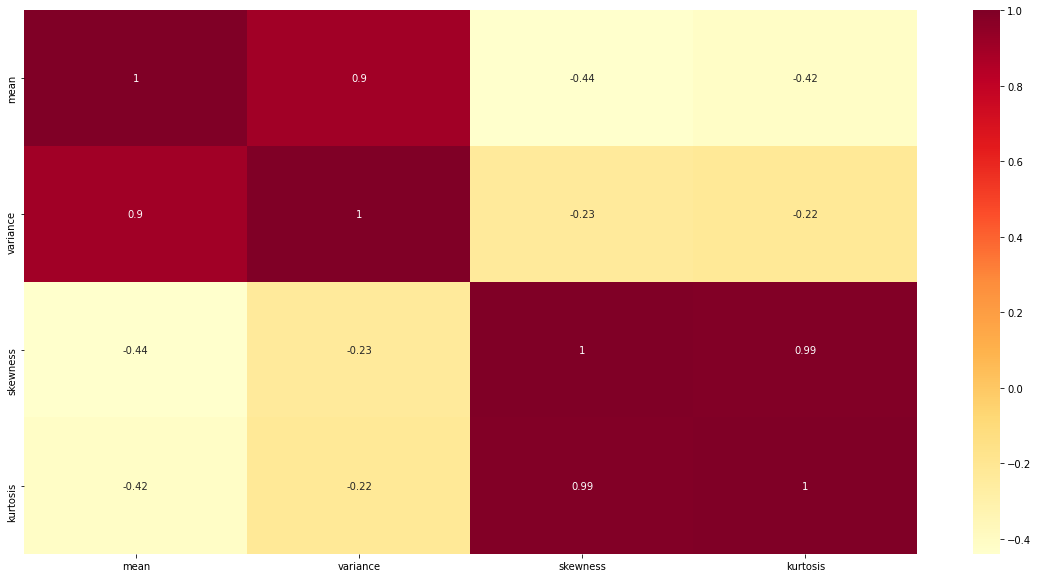

In [ ]:
#find the relation between the vriables :
plt.figure(figsize =(20,10))
c = df.corr()
sns.heatmap(c,cmap = "YlOrRd",annot = True)
c

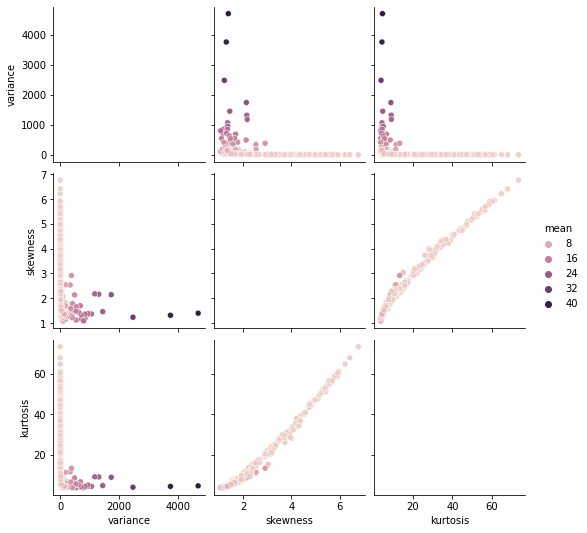

In [ ]:
sns.pairplot(df,hue ='mean')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa04be84590>,
      dtype=object)

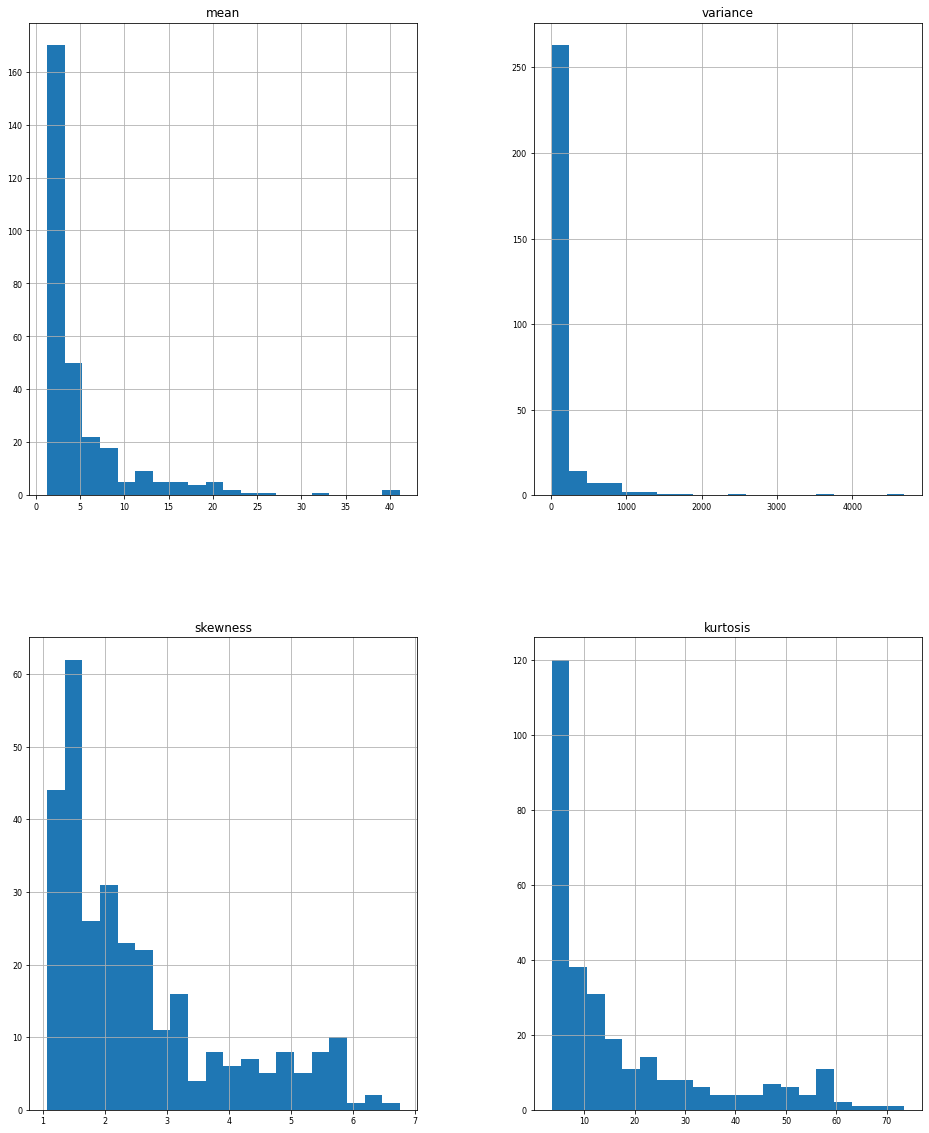

In [ ]:
df.hist(figsize=(16, 20), bins=20, xlabelsize=8, ylabelsize=8)

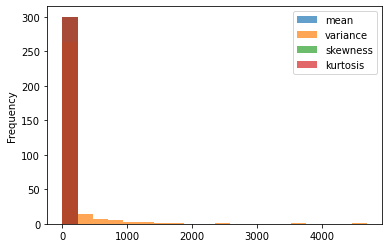

In [ ]:
df.plot.hist(bins=20, alpha=0.7)

##Perform Kmean Clustering

In [108]:
# Scale the Dataset
df_scaled = df.apply(zscore)

In [105]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [109]:
# Let us check optimal number of clusters-

# expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(df_scaled)
 
    # capture the cluster lables
  labels = clusters.labels_

# capture the centroids
  centroids = clusters.cluster_centers_

    # capture the intertia
  cluster_errors.append( clusters.inertia_ )

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,1200.000000
1,2,695.533778
2,3,360.312259
3,4,208.304089
4,5,131.659289
5,6,102.988943
6,7,78.118847
7,8,64.295004
8,9,51.552797
9,10,40.989812


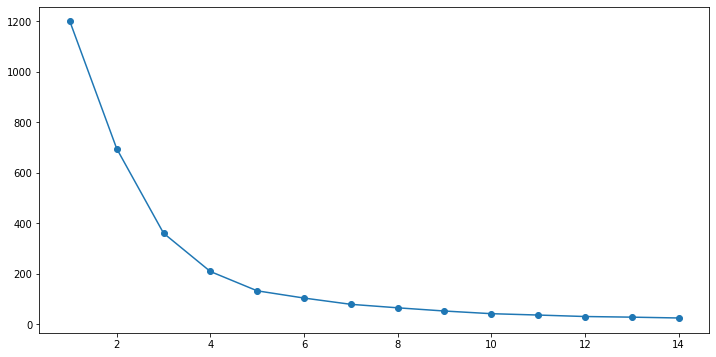

In [110]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

In [111]:
# Number of clusters
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)

In [112]:
# Fitting the input data
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [113]:
#Centroids
centroids=kmeans.cluster_centers_

In [114]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [115]:
centroid_df

,mean,variance,skewness,kurtosis
0,-0.111498,-0.172508,-0.421685,-0.434558
1,2.885578,2.590208,-0.784238,-0.720226
2,-0.619094,-0.313560,1.679590,1.700631


# Use silhouette_Coffeceint to Find best No of Cluster

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.2137299633547482


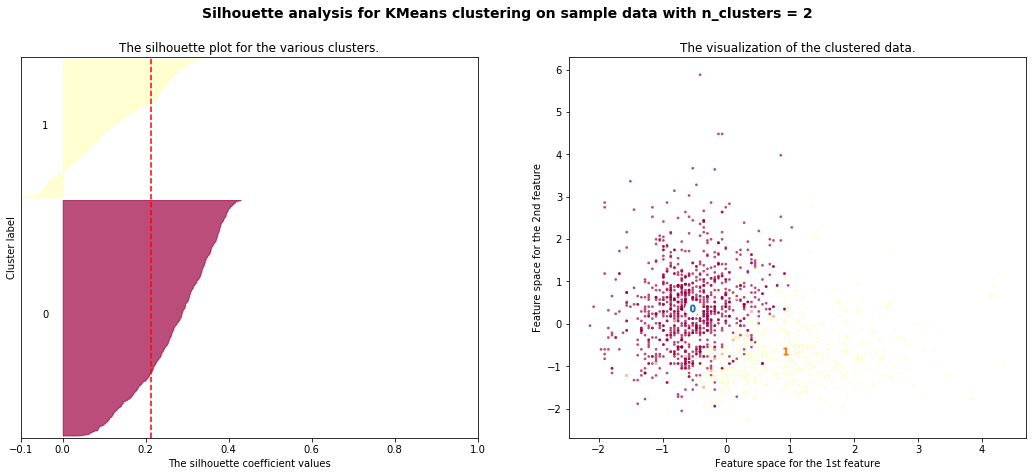

For n_clusters = 3 The average silhouette_score is : 0.18924495959290374


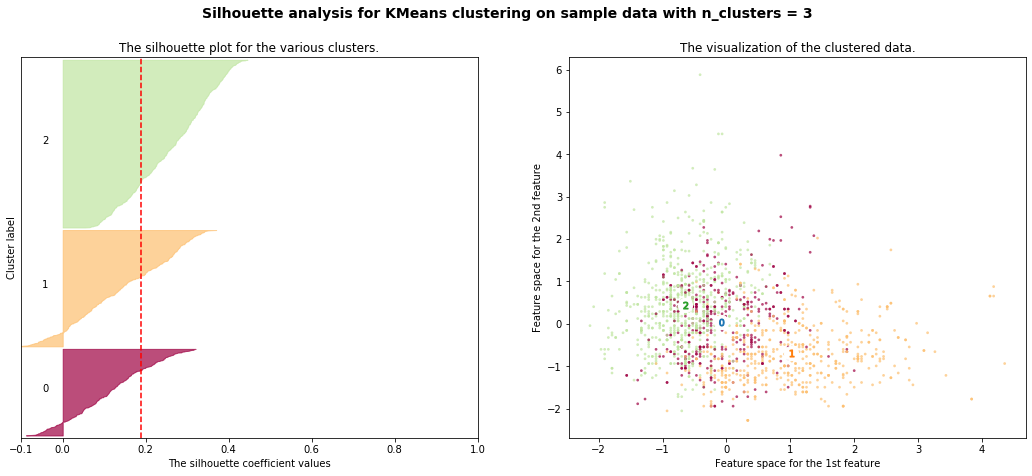

For n_clusters = 4 The average silhouette_score is : 0.1715543880353236


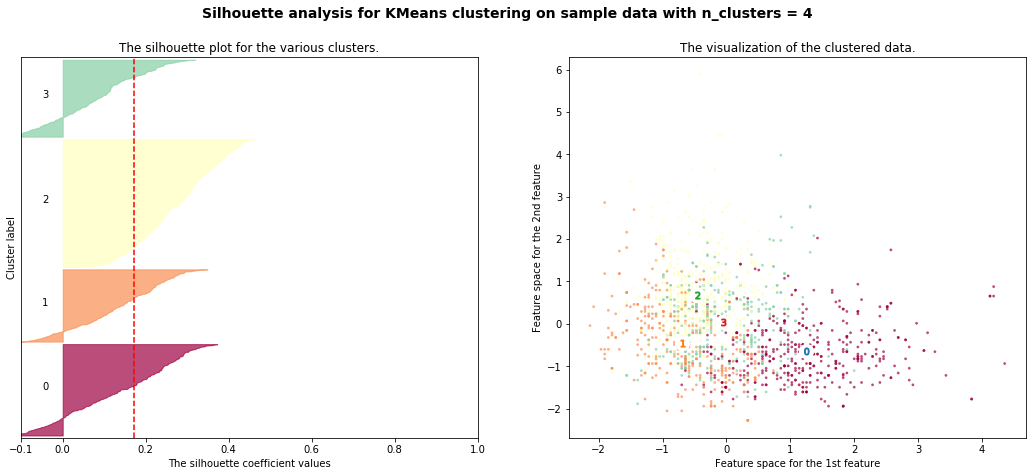

For n_clusters = 5 The average silhouette_score is : 0.1902699335922754


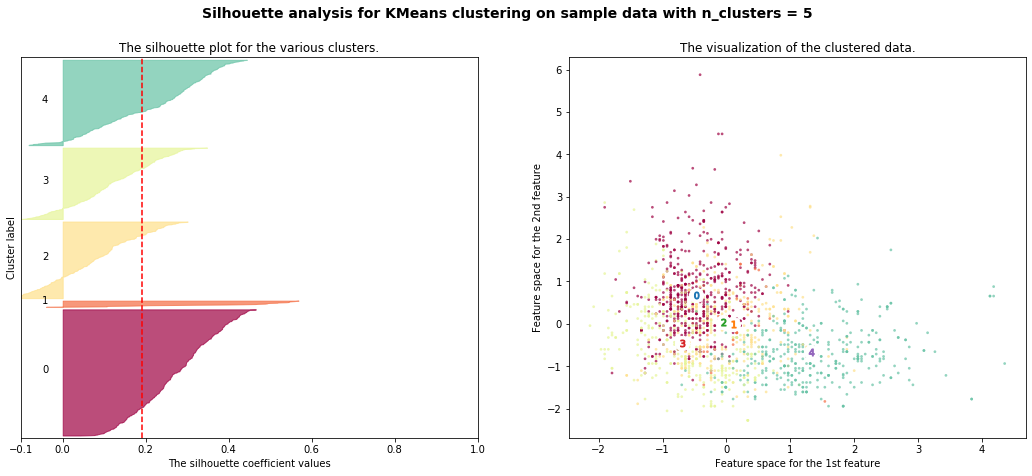

For n_clusters = 6 The average silhouette_score is : 0.19464464600480305


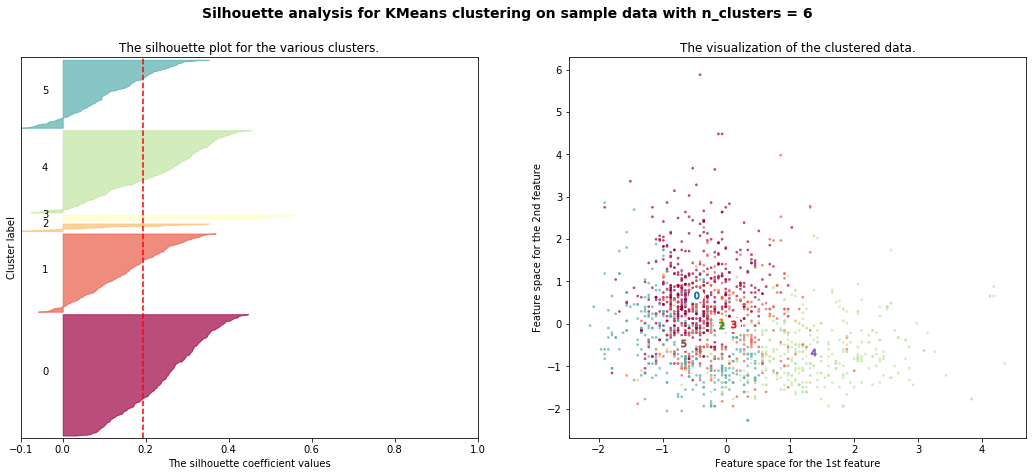

For n_clusters = 7 The average silhouette_score is : 0.19182704275437362


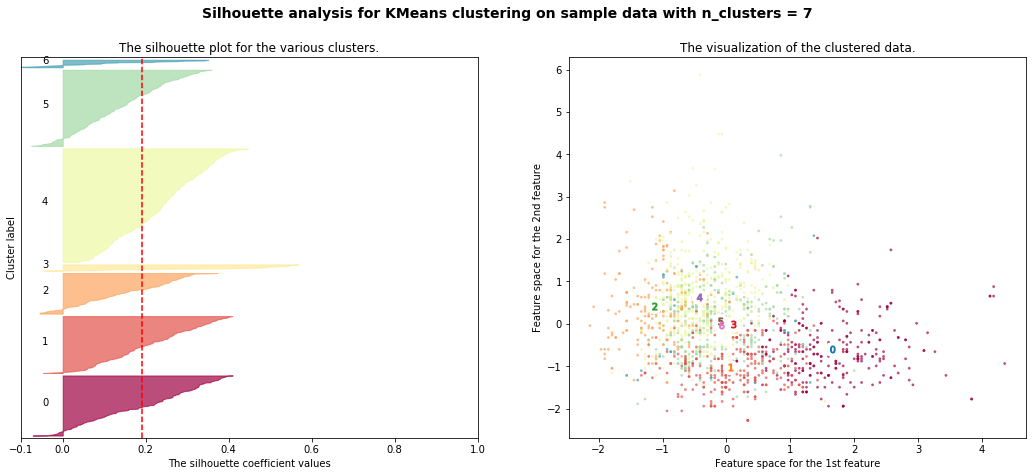

For n_clusters = 8 The average silhouette_score is : 0.1507773904835987


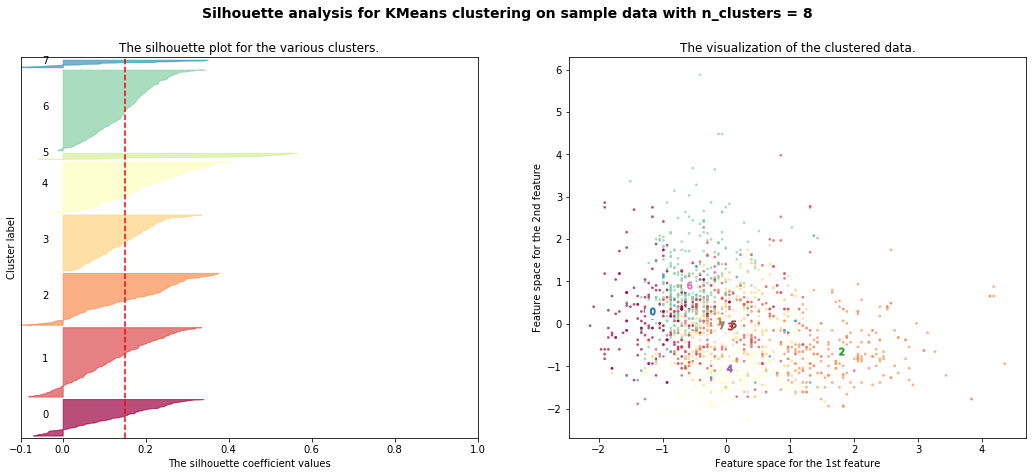

For n_clusters = 9 The average silhouette_score is : 0.1529887010335021


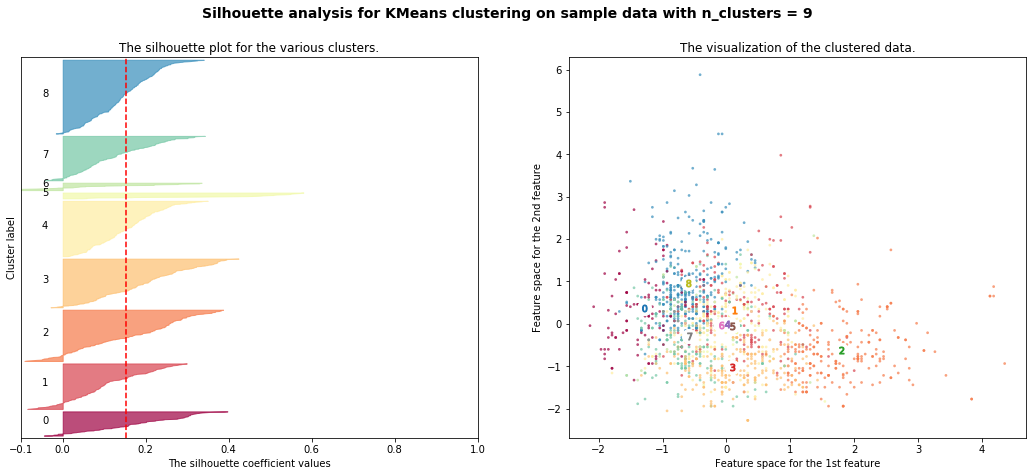

For n_clusters = 10 The average silhouette_score is : 0.1504872224425849


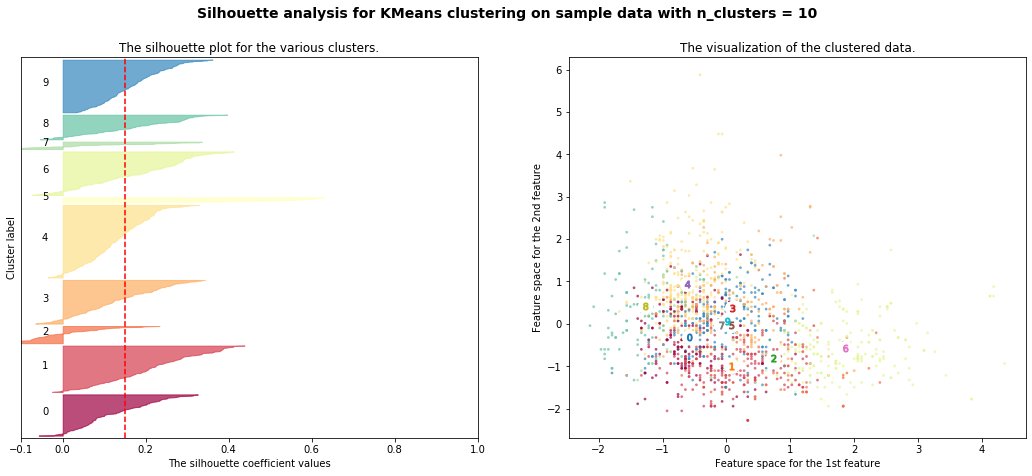

For n_clusters = 11 The average silhouette_score is : 0.15168519161781538


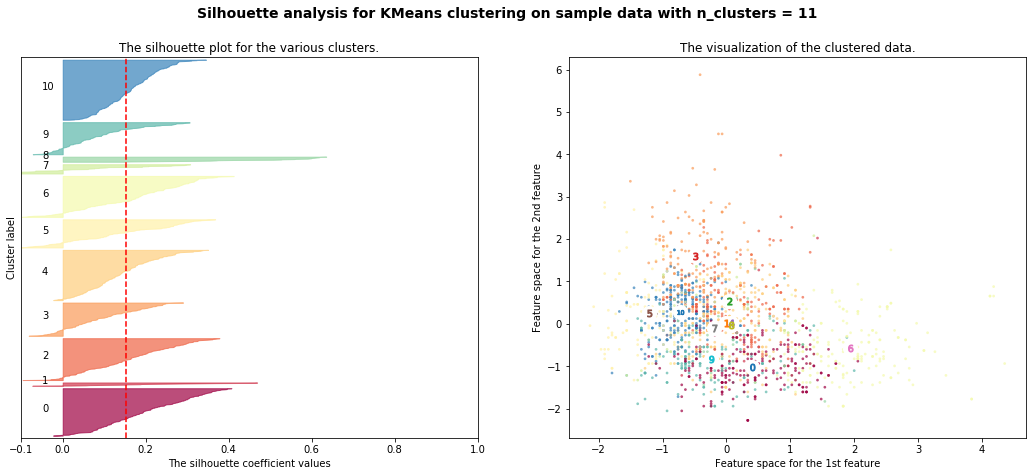

For n_clusters = 12 The average silhouette_score is : 0.1371836401781687


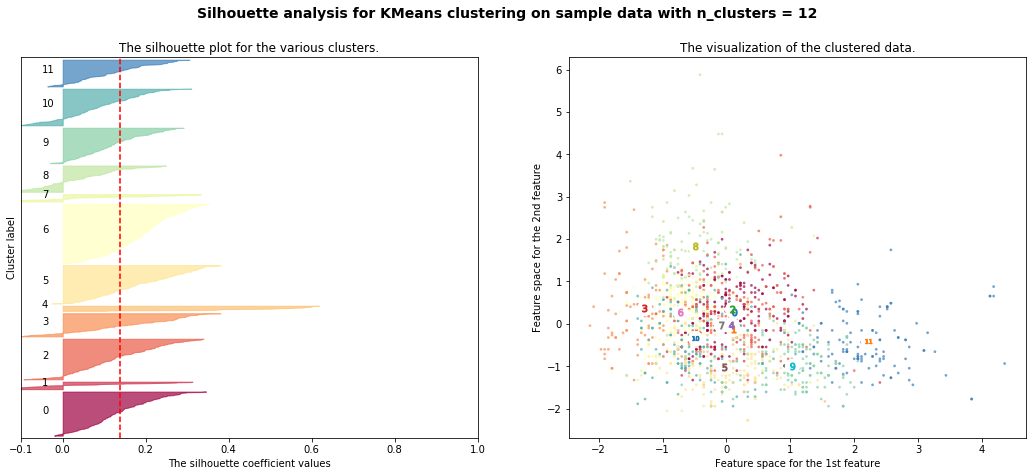

For n_clusters = 13 The average silhouette_score is : 0.14318489192315806


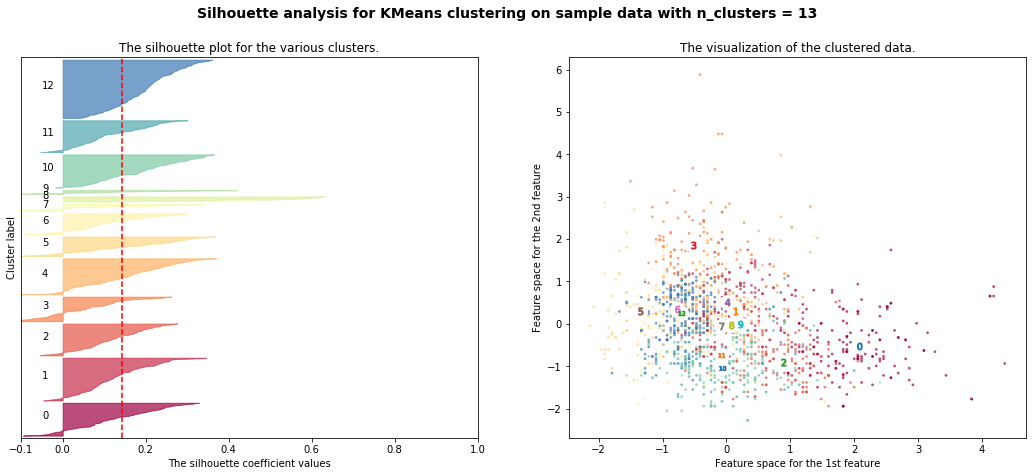

For n_clusters = 14 The average silhouette_score is : 0.15113293257406113


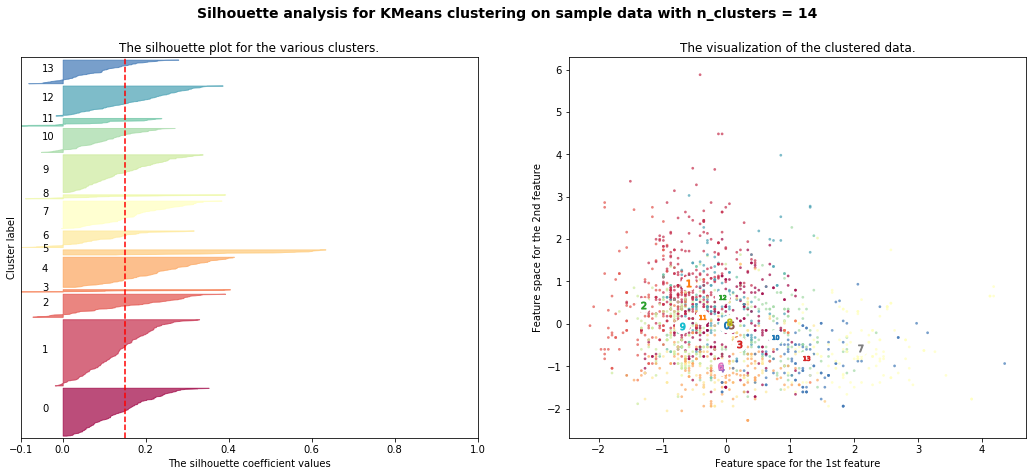

For n_clusters = 15 The average silhouette_score is : 0.14033694483551878


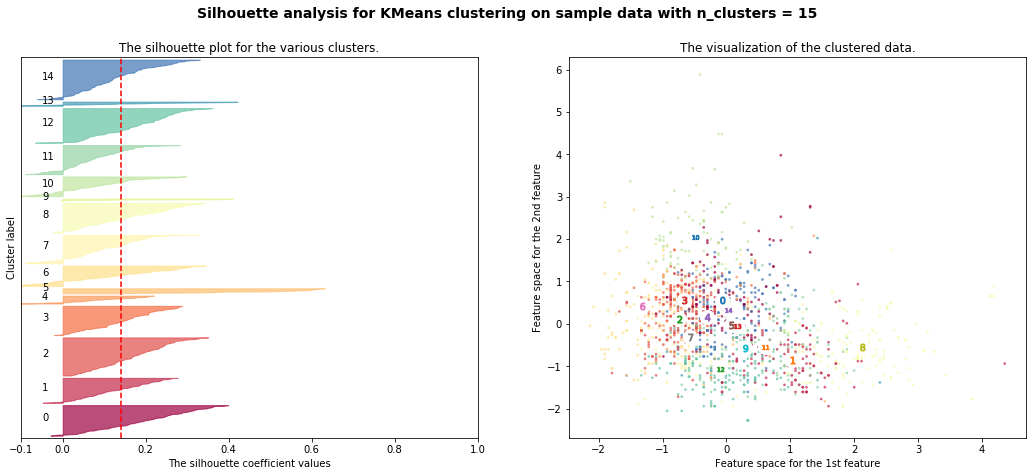

In [ ]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=df_scaled.values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,n_init=15, random_state=2)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

# Build a Dendogram

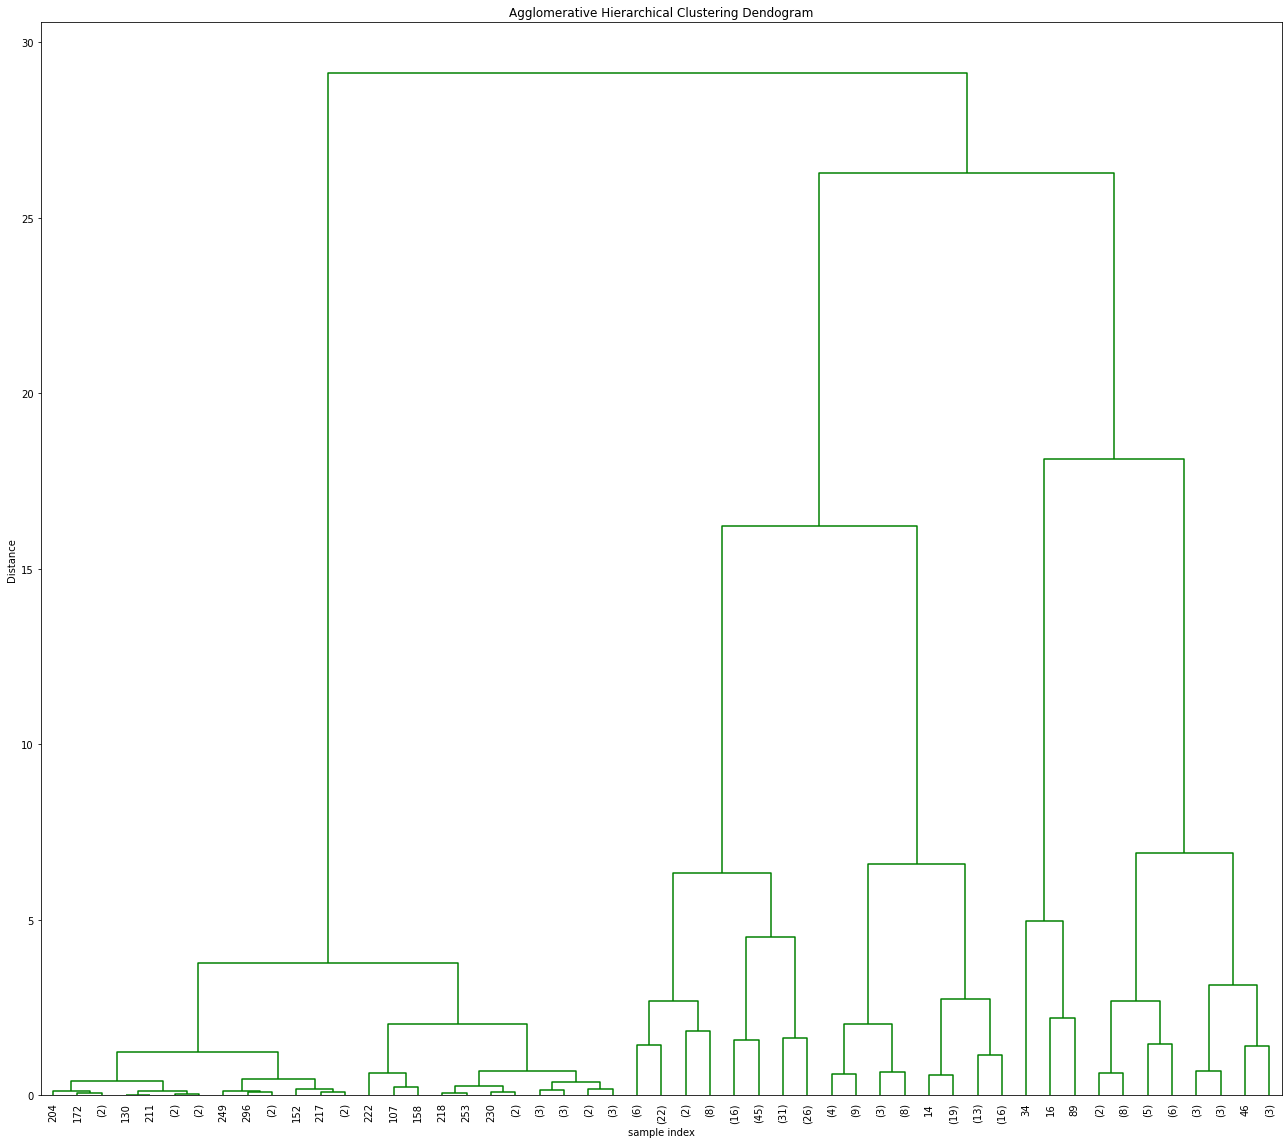

In [118]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_scaled, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=70,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()